In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("MWDD-export.csv")
df = df.dropna(subset=df.columns)
df.head


In [24]:
M_SOLAR = 1.989e+30
G = 6.674e-11

def g2r(surface_g, mass):
    g = 10 ** surface_g / 100
    mass_kg = mass * M_SOLAR

    radius = np.sqrt(G * mass_kg / g)

    return radius / 1000 # m to km

radius = g2r(df['logg'], df['mass'])
df['radius'] = radius

/Users/caritsang/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
L_SOLAR = 3.828e26 * 1e7

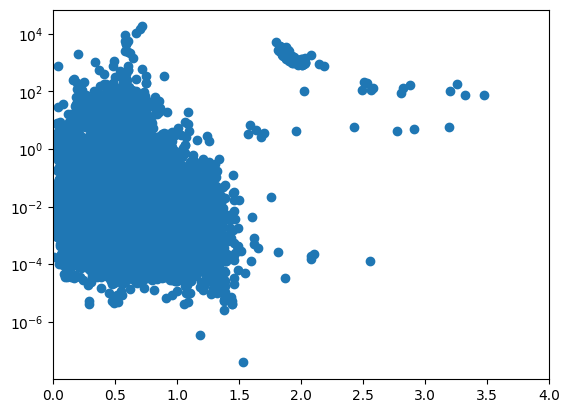

In [28]:
plt.scatter(df['mass'], 5.67e-5 * df['teff'] ** 4 * 4 * np.pi * (df['radius'] * 1e5) **2 / L_SOLAR)
#plt.ylim(0, 15)
plt.xlim(0, 4)
plt.yscale('log')

In [6]:
def dms2deg(dms_string):

    data = []
    for datum in dms_string:
        parts = datum.split()

        degrees = float(parts[0])
        minutes = float(parts[1])
        seconds = float(parts[2])

        sign = -1 if degrees < 0 else 1

        deg = degrees * 15 + sign * (minutes * 15 / 60) + sign * (seconds * 15 / 3600)
        rad = np.deg2rad(deg)

        if rad > np.pi:
            rad -= 2 * np.pi

        data.append(rad)

    return pd.Series(data)
#df['dec'] = dms2deg(df['icrsdec'])
df['ra'] = dms2deg(df['icrsra'])

(array([ 9322., 10573.,  9934., 10418.,  9975., 10807.,  8754.,  9620.,
        14192., 10365.]),
 array([-3.14148502e+00, -2.51317762e+00, -1.88487022e+00, -1.25656281e+00,
        -6.28255408e-01,  5.19962673e-05,  6.28359401e-01,  1.25666680e+00,
         1.88497421e+00,  2.51328161e+00,  3.14158902e+00]),
 <BarContainer object of 10 artists>)

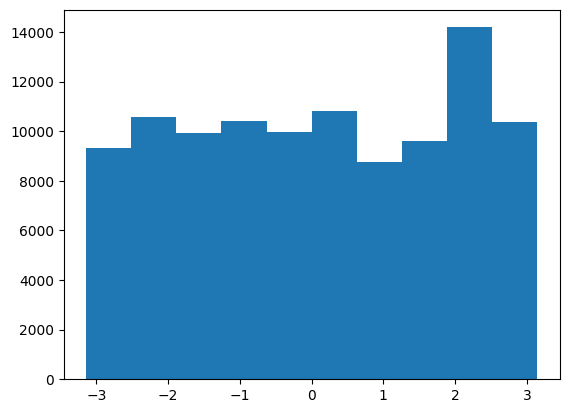

In [7]:
plt.hist(df['ra'])

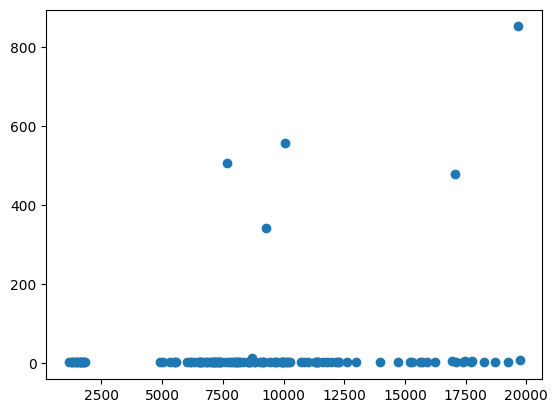

In [8]:
filtered_df = df[(df['radius'] < 20000) & (df['mass']> 1.5)]
plt.scatter(filtered_df['radius'], filtered_df['mass'])

/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_3468/413007533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_df.corr(), cmap='coolwarm')


<Axes: >

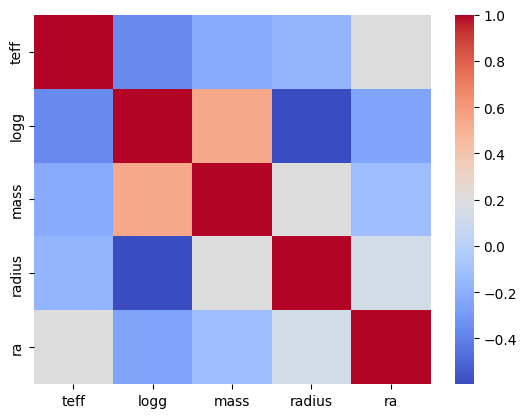

In [9]:
sns.heatmap(filtered_df.corr(), cmap='coolwarm')

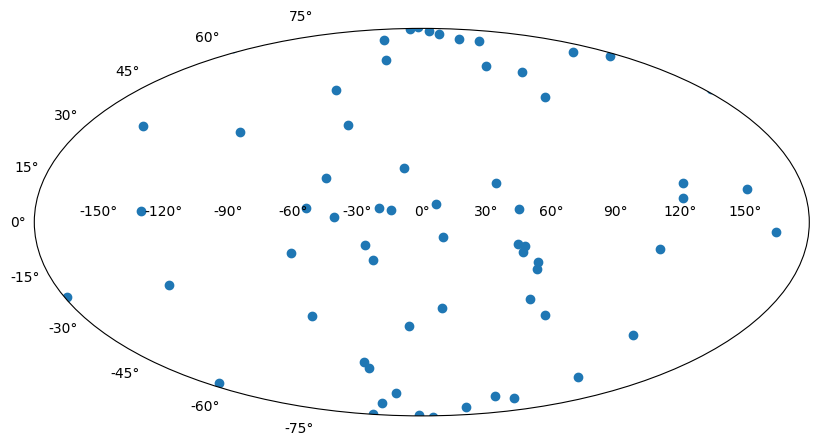

In [10]:
fig = plt.figure(figsize=(10, 8))
# Use 'aitoff' projection for the full-sky map
ax = fig.add_subplot(111, projection="aitoff")

# Plot the points. Use mass for the color scale.
sc = ax.scatter(dms2deg(filtered_df['icrsra']), dms2deg(filtered_df['icrsdec']))